# Python Plotting Basics

Let's take a look at some basic plotting with Python

If you'd like to follow along, connect to [VDI](https://opus.nci.org.au/display/Help/VDI+User+Guide) then in a terminal run:

    module use /g/data3/hh5/public/modules
    module load conda/analysis3
    jupyter notebook
    
This will start up a Jupyter Notebook on VDI, which is the same tool that this post is written in. Jupyter lets us work interactively with python and easily share code and plots.

In [3]:
# This is a python command
print("Hello world!")

# the output appears below

Hello world!


## Sample data

To start out, let's get some sample data to work with. NCI has a data store with all of the Australian CMIP5 data. You can find this on NCI's [Data Catlogue](https://datacatalogue.nci.org.au/metadata/0401/f1451_9473_6216_4637)

I like to use a library called Xarray to work with netCDF datasets. Let's grab the monthly surface temperature from the ACCESS1-0 AMIP run and load it in

In [4]:
import xarray

datapath = "http://dapds00.nci.org.au/thredds/dodsC/rr3/CMIP5/output1/CSIRO-BOM/ACCESS1-0/amip/mon/atmos/Amon/r1i1p1/latest/tas/tas_Amon_ACCESS1-0_amip_r1i1p1_197901-200812.nc"
data = xarray.open_dataset(datapath)

I'm accessing the data remotely here using what's called a THREDDS URL. You could just as easily use the `/g/data` filepath if you're running on VDI.

To see what's in the file we can just print it. This shows the dimensions, variables and metadata in the file:

In [5]:
print(data)

<xarray.Dataset>
Dimensions:    (bnds: 2, lat: 145, lon: 192, time: 360)
Coordinates:
  * time       (time) datetime64[ns] 1979-01-16T12:00:00 1979-02-15 ...
  * lat        (lat) float64 -90.0 -88.75 -87.5 -86.25 -85.0 -83.75 -82.5 ...
  * lon        (lon) float64 0.0 1.875 3.75 5.625 7.5 9.375 11.25 13.12 15.0 ...
    height     float64 ...
Dimensions without coordinates: bnds
Data variables:
    time_bnds  (time, bnds) float64 ...
    lat_bnds   (lat, bnds) float64 ...
    lon_bnds   (lon, bnds) float64 ...
    tas        (time, lat, lon) float32 ...
Attributes:
    institution:                     CSIRO (Commonwealth Scientific and Indus...
    institute_id:                    CSIRO-BOM
    experiment_id:                   amip
    source:                          ACCESS1-0 2011. Atmosphere: AGCM v1.0 (N...
    model_id:                        ACCESS1-0
    forcing:                         GHG, Oz, SA, Sl, Vl, BC, OC, (GHG = CO2,...
    parent_experiment_id:            N/A
    paren

## Accessing variables

Variables are accessed using dot syntax. Just like the full dataset we can print individual variables to see their metadata:

In [6]:
surface_temp = data.tas
print(surface_temp)

<xarray.DataArray 'tas' (time: 360, lat: 145, lon: 192)>
[10022400 values with dtype=float32]
Coordinates:
  * time     (time) datetime64[ns] 1979-01-16T12:00:00 1979-02-15 ...
  * lat      (lat) float64 -90.0 -88.75 -87.5 -86.25 -85.0 -83.75 -82.5 ...
  * lon      (lon) float64 0.0 1.875 3.75 5.625 7.5 9.375 11.25 13.12 15.0 ...
    height   float64 ...
Attributes:
    standard_name:     air_temperature
    long_name:         Near-Surface Air Temperature
    units:             K
    cell_methods:      time: mean
    cell_measures:     area: areacella
    history:           2012-02-17T05:21:51Z altered by CMOR: Treated scalar d...
    associated_files:  baseURL: http://cmip-pcmdi.llnl.gov/CMIP5/dataLocation...


## Selecting data

Before we can make a plot we first need to reduce the 3D data to 2D. One of the nice things about Xarray is that you can select data by a coordinate value, rather than manualy working out an index:

In [11]:
surface_temp_slice = surface_temp.sel(time = '1984-03')
print(surface_temp_slice.time)

<xarray.DataArray 'time' (time: 1)>
array(['1984-03-16T12:00:00.000000000'], dtype='datetime64[ns]')
Coordinates:
  * time     (time) datetime64[ns] 1984-03-16T12:00:00
    height   float64 ...
Attributes:
    bounds:         time_bnds
    axis:           T
    long_name:      time
    standard_name:  time


## Plotting

Now that we've selected our data we can get plotting

The notebook requires a special `%matplotlib inline` command to show plots, which isn't needed if you're writing a script.

To make a quick plot we can just call `.plot()` on a 2d variable:

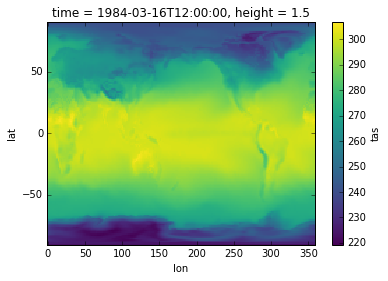

In [12]:
%matplotlib inline
import matplotlib.pyplot as plt

surface_temp_slice.plot()
plt.show()